#### Analyzing Neural Time Series Data
Python code for Chapter 10 -- converted from original Matlab by AE Studio (and ChatGPT)\
Original Matlab code by Mike X Cohen

This code accompanies the book, titled "Analyzing Neural Time Series Data" (MIT Press).\
Using the code without following the book may lead to confusion, incorrect data analyses, and misinterpretations of results.\
Mike X Cohen and AE Studio assume no responsibility for inappropriate or incorrect use of this code.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dot products

# two vectors of random numbers
a = np.random.randn(10, 1)
b = np.random.randn(10, 1)

# initialize temporary matrix.
pointwise_result = np.zeros(a.shape)

for i in range(len(a)):
    pointwise_result[i] = a[i] * b[i]
dotproduct = np.sum(pointwise_result)

# The above code is useful if you are unfamiliar with 
# how a dot product works. Following is a bit more elegant: 
dotproduct = np.sum(a * b)

# The most elegant way to compute the dot product, 
# however, is to use numpy's dot function: 
dotproduct = np.dot(a.T, b)

(-0.1, 3.6)

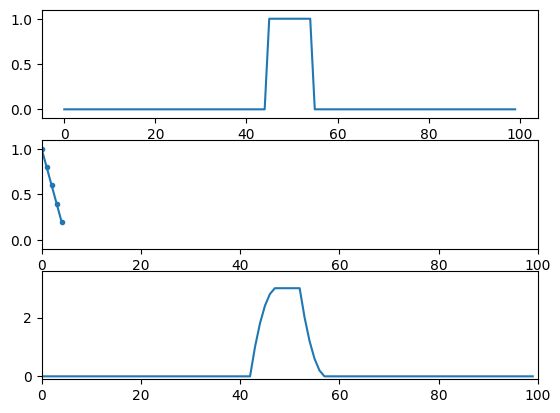

In [3]:
# figure 10.2

# impulse function (all zeros; 1 in the middle)
impfun = np.zeros(100)
impfun[50] = 1
# the figure in the book actually uses the following line, which creates a
# wider boxcar function rather than strictly an impulse function.
impfun[45:55] = 1

kernel = np.array([1, 0.8, 0.6, 0.4, 0.2])

# numpy's convolution function
numpy_conv_result = np.convolve(impfun, kernel, 'same')

plt.figure()

# plot the signal (impulse or boxcar)
plt.subplot(311)
plt.plot(impfun)
plt.ylim([-.1, 1.1])

# plot the kernel
plt.subplot(312)
plt.plot(kernel, '.-')
plt.xlim([0, 100])
plt.ylim([-.1, 1.1])

# plot the result of convolution
plt.subplot(313)
plt.plot(numpy_conv_result)
plt.xlim([0, 100])
plt.ylim([-.1, 3.6])

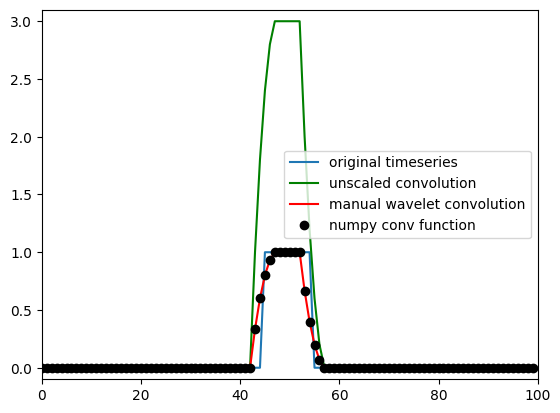

In [4]:
# figure 10.4

# data that we'll use for convolution (must be zero-padded).
dat4conv = np.concatenate((np.zeros(len(kernel) - 1), impfun, np.zeros(len(kernel) - 1)))

# used for cutting the result of convolution
half_of_kernel_size = int(np.ceil((len(kernel) - 1) / 2))

# initialize convolution output
convolution_result = np.zeros(len(impfun) + len(kernel) - 1)

# run convolution (note that kernel is flipped backwards)
for ti in range(len(convolution_result) - half_of_kernel_size):
    convolution_result[ti] = np.sum(dat4conv[ti:ti + len(kernel)] * kernel[::-1])

# cut off edges
convolution_result = convolution_result[half_of_kernel_size:-half_of_kernel_size]

plt.figure()
plt.plot(impfun)
plt.plot(convolution_result, 'g')
plt.plot(convolution_result / np.sum(kernel), 'r')
plt.plot(numpy_conv_result / np.sum(kernel), 'ko')
plt.xlim([0, 100])
plt.ylim([-.1, 3.1])
plt.legend(['original timeseries', 'unscaled convolution', 'manual wavelet convolution', 'numpy conv function'])